Risk board game assignment Notebook 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

This cell defines the function that will roll the dice and track the wins for the respective sides,

In [ ]:
#Function to simulate a battle round
def battle_round(attacker_troops, defender_troops):
    #Determine the number of dice to roll
    attacker_dice_count = min(3, attacker_troops)
    defender_dice_count = min(2, defender_troops)
    
    #roll dice
    attacker_dice = sorted(np.random.randint(1, 7, attacker_dice_count), reverse=True)
    defender_dice = sorted(np.random.randint(1, 7, defender_dice_count), reverse=True)
    
    #compare dice
    attacker_wins = 0
    defender_wins = 0
    for a, d in zip(attacker_dice, defender_dice):
        if a > d:
            attacker_wins += 1
        else:  
            defender_wins += 1
    
    return attacker_wins, defender_wins


This cell will run the above function 1000 times. The number of wins is calculated and summed up at the end. 
The results are then printed.

In [ ]:
#run 1000 battles
results = [battle_round(3, 2) for _ in range(1000)]
attacker_wins = sum(r[0] for r in results)
defender_wins = sum(r[1] for r in results)

#print win count
print("Total Attacker Wins:", attacker_wins)
print("Total Defender Wins:", defender_wins)

Total Attacker Wins: 1094
Total Defender Wins: 906


We then plot the results using a bar and a pie chart.

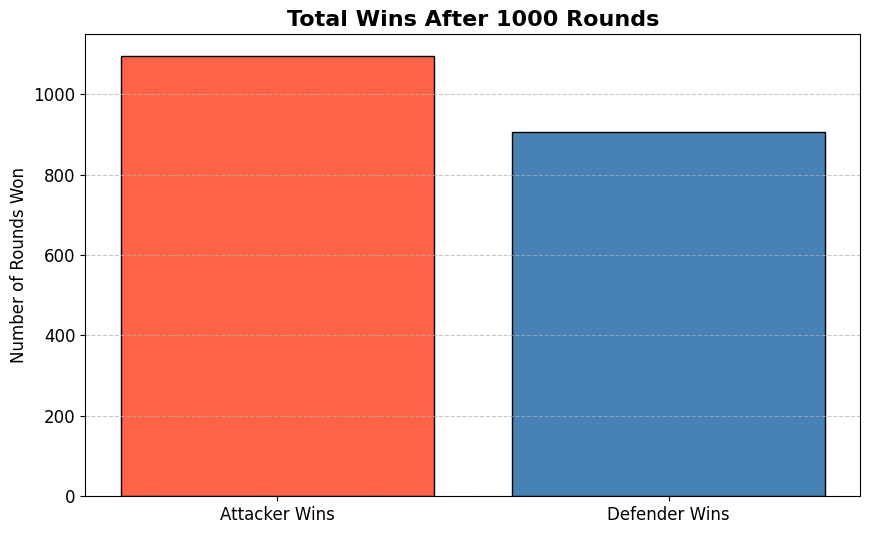

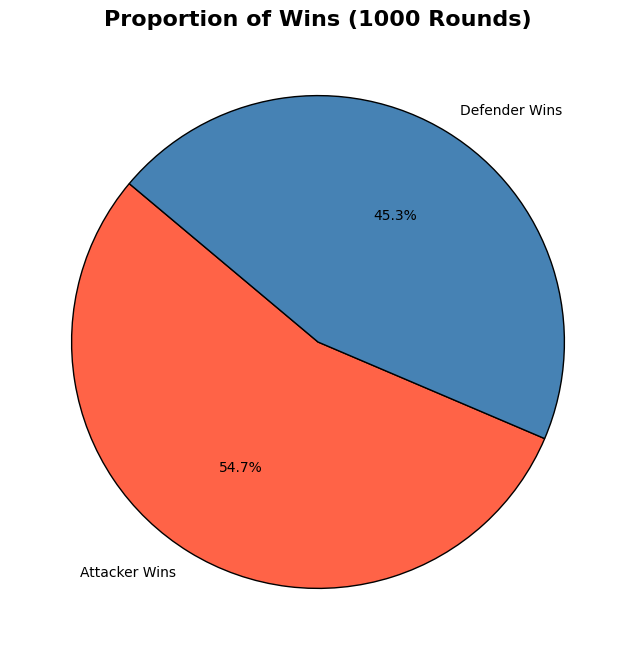

In [ ]:
#Bar chart
plt.figure(figsize=(10, 6))
labels = ['Attacker Wins', 'Defender Wins']
wins = [attacker_wins, defender_wins]

plt.bar(labels, wins, color=['#FF6347', '#4682B4'], edgecolor='black')
plt.title("Total Wins After 1000 Rounds", fontsize=16, fontweight='bold')
plt.ylabel("Number of Rounds Won", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Pie chart
plt.figure(figsize=(8, 8))
colors = ['#FF6347', '#4682B4']
plt.pie(
    wins, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title("Proportion of Wins (1000 Rounds)", fontsize=16, fontweight='bold')
plt.show()

Now, we simnulate a battle that continues until one army is completely destroyed.
we then use a bar chart and pie chart to visualise this again.

In [10]:
#Simulate a full battle until one side is wiped out
def full_battle(attacker_army, defender_army):
    rounds = 0
    total_attacker_wins = 0
    total_defender_wins = 0

    while attacker_army > 0 and defender_army > 0:
        att_wins, def_wins = battle_round(attacker_army, defender_army)
        attacker_army -= def_wins
        defender_army -= att_wins
        total_attacker_wins += att_wins
        total_defender_wins += def_wins
        rounds += 1 
    
    return attacker_army, defender_army, total_attacker_wins, total_defender_wins, rounds


Final Attacker Troops: 28
Final Defender Troops: 0
Total Attacker Wins: 30
Total Defender Wins: 22
Total Rounds Fought: 27


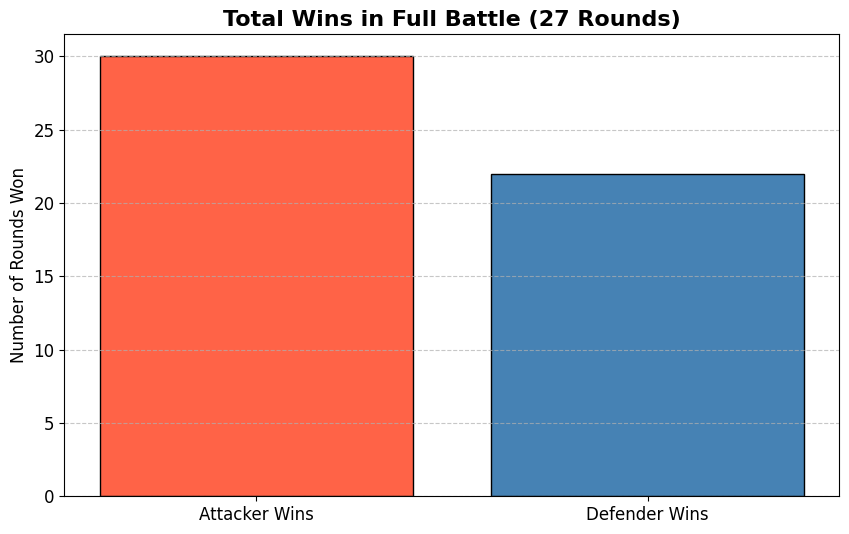

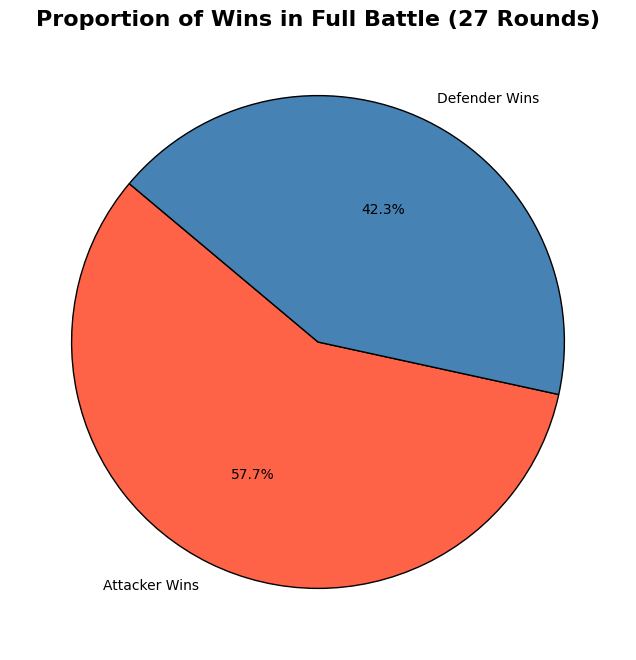

In [ ]:
#Simulate one full battle
attacker_army = 50
defender_army = 30
final_attacker, final_defender, total_attacker_wins, total_defender_wins, total_rounds = full_battle(attacker_army, defender_army)

#print results
print(f"Final Attacker Troops: {final_attacker}")
print(f"Final Defender Troops: {final_defender}")
print(f"Total Attacker Wins: {total_attacker_wins}")
print(f"Total Defender Wins: {total_defender_wins}")
print(f"Total Rounds Fought: {total_rounds}")

#Bar chart
plt.figure(figsize=(10, 6))
outcomes = ['Attacker Wins', 'Defender Wins']
final_wins = [total_attacker_wins, total_defender_wins]

plt.bar(outcomes, final_wins, color=['#FF6347', '#4682B4'], edgecolor='black')
plt.title(f"Total Wins in Full Battle ({total_rounds} Rounds)", fontsize=16, fontweight='bold')
plt.ylabel("Number of Rounds Won", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Pie chart
plt.figure(figsize=(8, 8))
colors = ['#FF6347', '#4682B4']
plt.pie(
    final_wins, 
    labels=outcomes, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title(f"Proportion of Wins in Full Battle ({total_rounds} Rounds)", fontsize=16, fontweight='bold')
plt.show()